# E-Commerce Dataset

Analytics on E-commerce

Libraries we need are imported first

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')

Data used in this exercise is stored in the DATA folder

In [6]:
data_path = '../../../DATA/ecommerce_orig.txt'

The dataframe is created using the .read_csv function of Pandas

In [9]:
data = pd.read_csv(data_path, delimiter = "\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155988 entries, 0 to 155987
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   weeknumberbyyear            155988 non-null  object 
 1   TrafficSourceType           155988 non-null  object 
 2   Device                      155988 non-null  object 
 3   VisitorType                 155988 non-null  object 
 4   NonBounceVisit              155988 non-null  object 
 5   HomePageWasVisited          155988 non-null  object 
 6   ProductPageWasVisited       155988 non-null  object 
 7   VisitToProductAfterListing  155988 non-null  object 
 8   SiteSearchWasUsed           155988 non-null  object 
 9   VisitWithAddtoBag           155988 non-null  object 
 10  VisitWithAddtoWishlist      155988 non-null  object 
 11  ShippingAddressWasVisited   155988 non-null  object 
 12  PaymentPageWasVisited       155988 non-null  object 
 13  ReviewOrderPag

The original CSV file is structured as a dataframe with the corresponding categories

After renaming the variable of the dataframe, we use .describe() to see essential statistics for each variable

In [13]:
data.describe()

,Visits,Revenue,Orders
count,155988.000000,1.559880e+05,155988.000000
mean,227.485441,1.595634e+03,2.098226
std,1556.122164,1.215119e+04,14.548048
min,1.000000,0.000000e+00,0.000000
25%,1.000000,0.000000e+00,0.000000
50%,2.000000,0.000000e+00,0.000000
75%,10.000000,2.615880e+02,1.000000
max,58182.000000,1.348615e+06,1605.000000


We remove the rows where revenue is zero. 

In [18]:
data = data[data['Revenue'] > 0] 
data

,weeknumberbyyear,TrafficSourceType,Device,VisitorType,NonBounceVisit,HomePageWasVisited,ProductPageWasVisited,VisitToProductAfterListing,SiteSearchWasUsed,VisitWithAddtoBag,VisitWithAddtoWishlist,ShippingAddressWasVisited,PaymentPageWasVisited,ReviewOrderPageWasVisited,ConfirmationPageWasVisited,Visits,Revenue,Orders
4,2016-01,Affiliates,Desktop,New,Yes,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,4,354.150,1
7,2016-01,Affiliates,Desktop,New,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,Yes,3,3097.844,3
12,2016-01,Affiliates,Desktop,New,Yes,No,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,1,1459.481,1
27,2016-01,Affiliates,Desktop,New,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3,632.951,2
32,2016-01,Affiliates,Desktop,Returning,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,5,89.875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155946,2017-01,Referrals,Mobile,Returning,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,3,186.135,1
155952,2017-01,Referrals,Mobile,Returning,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,5,195.000,1
155959,2017-01,Referrals,Tablet,New,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,1,421.405,2
155976,2017-01,Referrals,Tablet,Returning,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,Yes,4,308.066,1


We now make scatterplots for a number of variables 

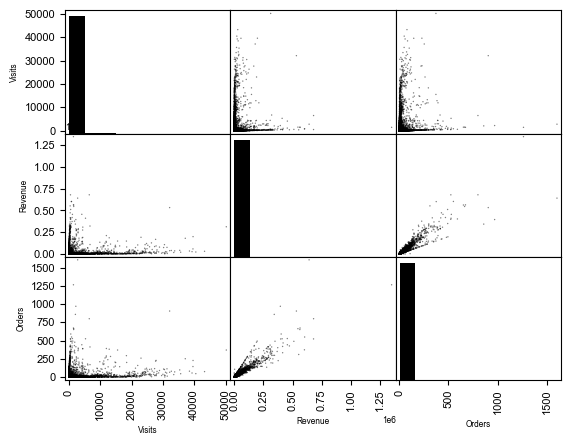

In [97]:
pd.plotting.scatter_matrix(data[['Visits', 'Revenue', 'Orders']],s=4,c='k',hist_kwds={'color':['black']});

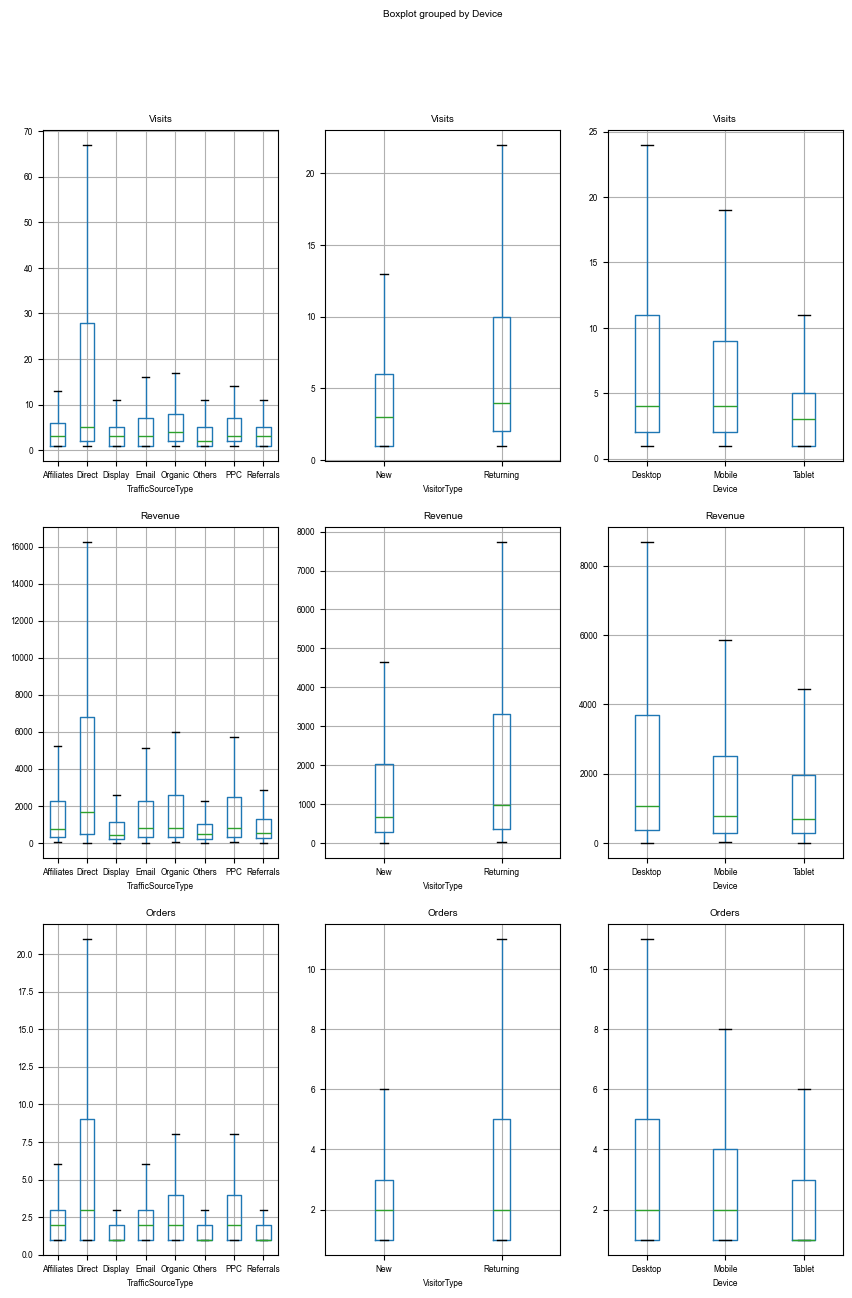

In [95]:
pl.rcParams['font.family'] = "Arial"
pl.rcParams['font.size'] = "6"
fig, ax = pl.subplots(3,3,figsize=(10, 15)) 
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)
data.boxplot('Visits', by='TrafficSourceType', ax=ax[0,0], showfliers=False);
data.boxplot('Visits', by='VisitorType', ax=ax[0,1], showfliers=False);
data.boxplot('Visits', by='Device', ax=ax[0,2], showfliers=False);
data.boxplot('Revenue', by='TrafficSourceType', ax=ax[1,0], showfliers=False);
data.boxplot('Revenue', by='VisitorType', ax=ax[1,1], showfliers=False);
data.boxplot('Revenue', by='Device', ax=ax[1,2], showfliers=False);
data.boxplot('Orders', by='TrafficSourceType', ax=ax[2,0], showfliers=False);
data.boxplot('Orders', by='VisitorType', ax=ax[2,1], showfliers=False);
data.boxplot('Orders', by='Device', ax=ax[2,2], showfliers=False);
# data.boxplot('HomePageWasVisited', by='TrafficSourceType', ax=ax[3,0], showfliers=False);
# data.boxplot('HomePageWasVisited', by='VisitorType', ax=ax[3,1], showfliers=False);
# data.boxplot('HomePageWasVisited', by='Device', ax=ax[3,2], showfliers=False);

## KPIs

In [104]:
data['AOV']=data['Revenue']/data['Orders']
data['ConversionRate']=data['Orders']/data['Visits']
data

,weeknumberbyyear,TrafficSourceType,Device,VisitorType,NonBounceVisit,HomePageWasVisited,ProductPageWasVisited,VisitToProductAfterListing,SiteSearchWasUsed,VisitWithAddtoBag,VisitWithAddtoWishlist,ShippingAddressWasVisited,PaymentPageWasVisited,ReviewOrderPageWasVisited,ConfirmationPageWasVisited,Visits,Revenue,Orders,ConversionRate,AOV
4,2016-01,Affiliates,Desktop,New,Yes,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,4,354.150,1,0.250000,354.150000
7,2016-01,Affiliates,Desktop,New,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,Yes,3,3097.844,3,1.000000,1032.614667
12,2016-01,Affiliates,Desktop,New,Yes,No,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,1,1459.481,1,1.000000,1459.481000
27,2016-01,Affiliates,Desktop,New,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3,632.951,2,0.666667,316.475500
32,2016-01,Affiliates,Desktop,Returning,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,5,89.875,1,0.200000,89.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155946,2017-01,Referrals,Mobile,Returning,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,3,186.135,1,0.333333,186.135000
155952,2017-01,Referrals,Mobile,Returning,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,5,195.000,1,0.200000,195.000000
155959,2017-01,Referrals,Tablet,New,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,1,421.405,2,2.000000,210.702500
155976,2017-01,Referrals,Tablet,Returning,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,Yes,4,308.066,1,0.250000,308.066000


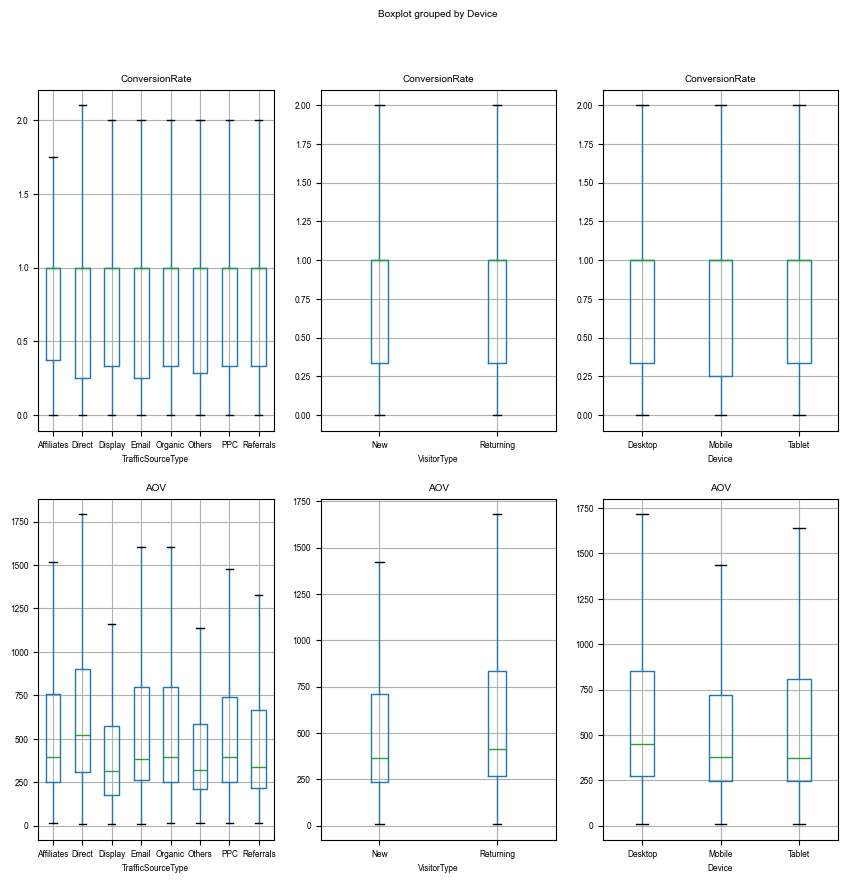

In [108]:
pl.rcParams['font.family'] = "Arial"
pl.rcParams['font.size'] = "6"
fig, ax = pl.subplots(2,3,figsize=(10, 10)) 
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)
data.boxplot('ConversionRate', by='TrafficSourceType', ax=ax[0,0], showfliers=False);
data.boxplot('ConversionRate', by='VisitorType', ax=ax[0,1], showfliers=False);
data.boxplot('ConversionRate', by='Device', ax=ax[0,2], showfliers=False);
data.boxplot('AOV', by='TrafficSourceType', ax=ax[1,0], showfliers=False);
data.boxplot('AOV', by='VisitorType', ax=ax[1,1], showfliers=False);
data.boxplot('AOV', by='Device', ax=ax[1,2], showfliers=False);

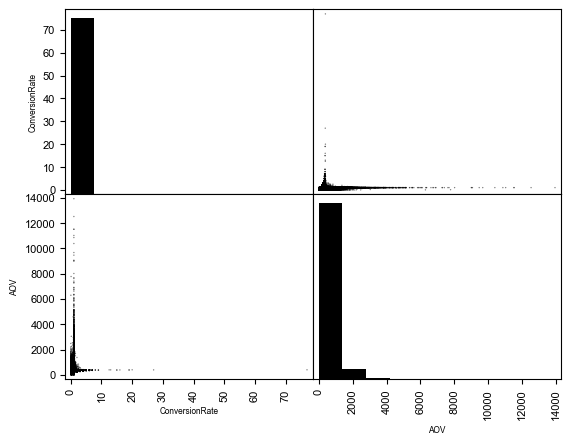

In [110]:
pd.plotting.scatter_matrix(data[['ConversionRate', 'AOV']],s=4,c='k',hist_kwds={'color':['black']});